<a href="https://colab.research.google.com/github/MesSobble/ComplejidadAlgoritmica/blob/main/Copia_de_AvanceTrabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import numpy as np
import random
from os.path import exists

# Diccionarios para las estaciones y los buses
Estaciones = {}
Buses = {}

# Función para convertir una matriz a CSV
def MatrixToCSV(matrix):
  tabla = pd.DataFrame(matrix)
  tabla.to_csv('Estaciones_Buses.csv', index=False)

# Función para crear una matriz aleatoria de tamaño n x m
def randomMatrix(n: int, m: int):
  matrix = np.zeros((n, m))
  for i in range(n):
    for j in range(m):
      matrix[i,j] = random.randint(0,1)
  MatrixToCSV(matrix)
  return matrix

# Función para leer el archivo CSV
def readCSV():
  if exists('Estaciones_Buses.csv'):
    matrix = np.loadtxt(open("Estaciones_Buses.csv", "rb"), delimiter=",", skiprows=1)
    return matrix
  else:
    return randomMatrix(37, 15) # Modificado para crear una matriz de 37x15

# Función para obtener las estaciones
def getEstaciones(matrix, n: int, m: int):
  for i in range(n):
    label = f'{i + 1}'
    arr = [f'{j + 1}' for j in range(m) if matrix[i][j] == 1]
    Estaciones[label] = arr

# Función para obtener los buses
def getBuses(matrix, n: int, m: int):
  for j in range(m):
    label = f'{j + 1}'
    arr = [f'{i + 1}' for i in range(n) if matrix[i][j] == 1]
    Buses[label] = arr

# Función para encontrar el bus que llega más rápido a la estación solicitada
def findFastestBus(estacion_solicitada: str):
  buses_disponibles = Estaciones[estacion_solicitada]
  tiempos_de_llegada = {bus: random.randint(1,60) for bus in buses_disponibles} # Tiempos de llegada aleatorios entre 1 y 60 minutos
  bus_mas_rapido = min(tiempos_de_llegada, key=tiempos_de_llegada.get)
  return bus_mas_rapido

matrix = readCSV()
getEstaciones(matrix, 37, 15)
getBuses(matrix, 37, 15)

estacion_solicitada = '5' # Modificar con la estación solicitada
bus_mas_rapido = findFastestBus(estacion_solicitada)
print(f"El bus que llega más rápido a la estación {estacion_solicitada} es el bus {bus_mas_rapido}.")

El bus que llega más rápido a la estación 5 es el bus 2.


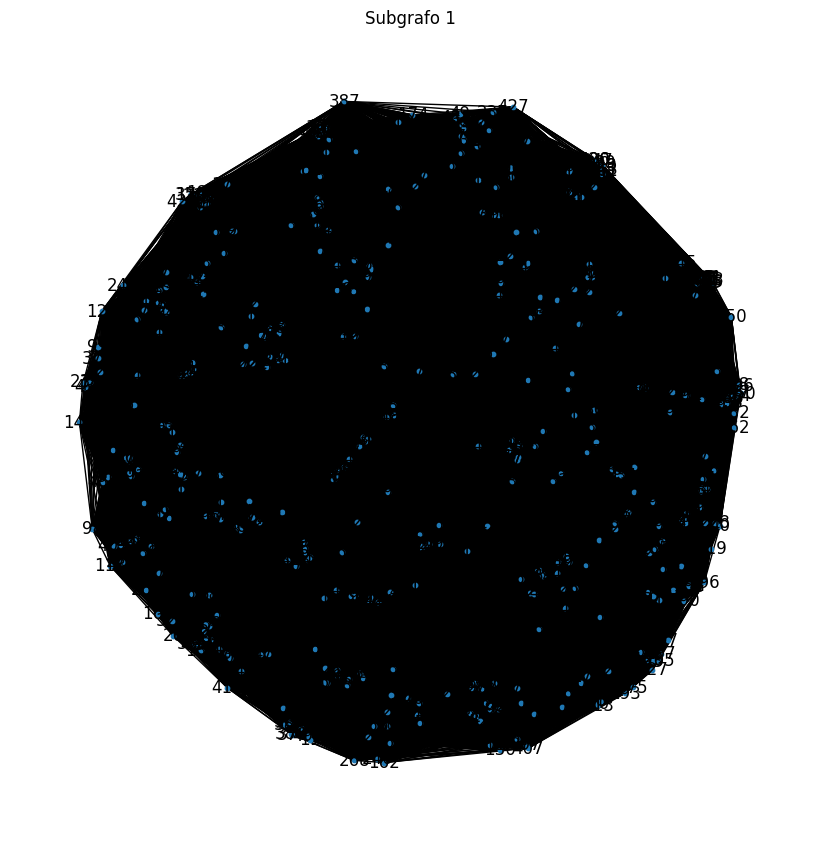

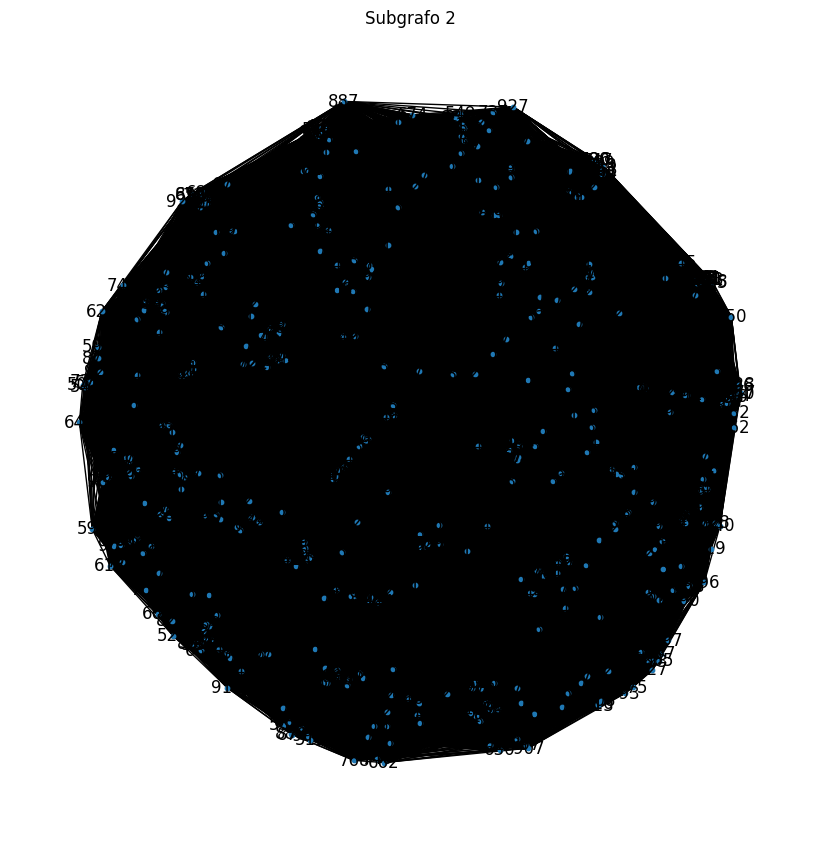

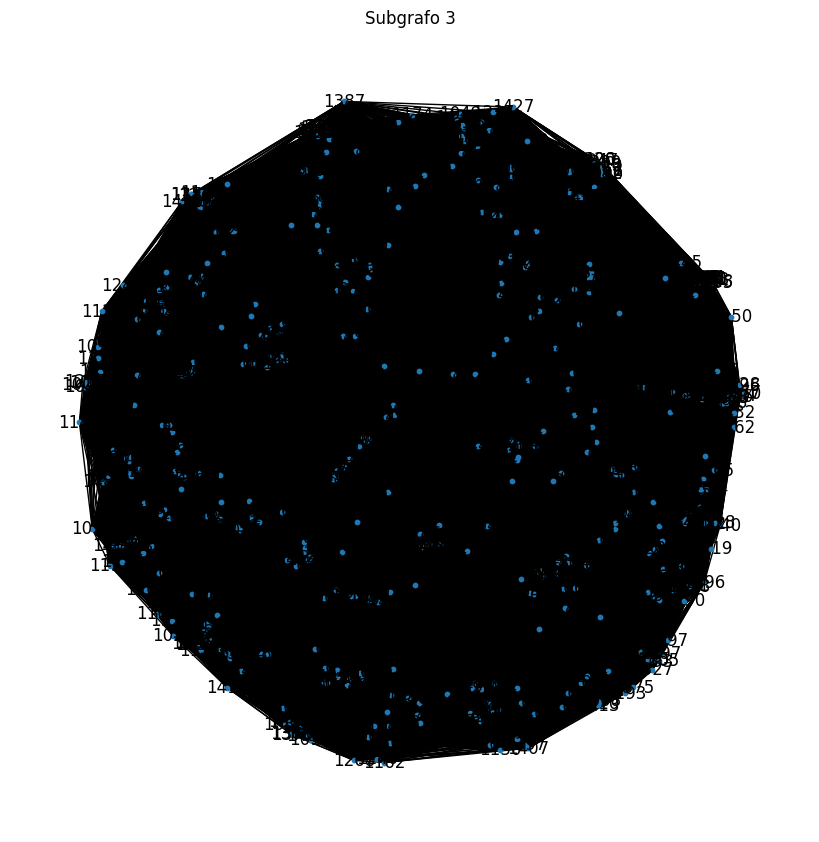

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crea un grafo completo con 1500 nodos
G = nx.complete_graph(1500)

# Divide el grafo en subgrafos de 500 nodos cada uno
subgrafos = [G.subgraph(range(i, i + 500)) for i in range(0, 1500, 500)]

# Dibuja cada subgrafo
for i, subgrafo in enumerate(subgrafos):
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(subgrafo, seed=42)  # Posición de los nodos
    nx.draw(subgrafo, pos, with_labels=True, node_size=10)
    plt.title(f'Subgrafo {i + 1}')
    plt.show()

In [ ]:
estaciones = {
    'Estacion A': ['Estacion B', 'Estacion C'],
    'Estacion B': ['Estacion A', 'Estacion D'],
    'Estacion C': ['Estacion A', 'Estacion E'],
    'Estacion D': ['Estacion B', 'Estacion F'],
    'Estacion E': ['Estacion C'],
    'Estacion F': ['Estacion D'],
    'Naranjal': ['Expreso2', 'Expreso3', 'Expreso4', 'Expreso5', 'SX', 'SXN', 'A', 'B', 'D'],
    'Izaguirre': ['A', 'B', 'D', 'Expreso4', 'Expreso6', 'Expreso8'],
    'Pacifico': ['A', 'B', 'D'],
    'Independencia': ['A', 'B', 'D', 'Expreso5', 'Expreso6', 'Expreso8'],
    'Los Jasmines': ['A', 'B', 'D'],
    'Tomas Valle': ['A', 'B', 'D', 'Expreso4', 'Expreso5', 'Expreso7', 'Expreso8'],
    'El Milagro': ['A', 'B', 'D'],
    'Honorio Delgado': ['A', 'B', 'D'],
    'Uni': ['A', 'B', 'D', 'Expreso2', 'Expreso4', 'Expreso5', 'Expreso8', 'Expreso9'],
    'Parque del Trabajo': ['A', 'B', 'D'],
    'Caqueta': ['A', 'B', 'D', 'Expreso4', 'Expreso5', 'Expreso8', 'Expreso9'],
    'Dos de Mayo': ['B', 'D', 'Expreso4'],
    'Quilca': ['A', 'B', 'D'],
    'España': ['A', 'B', 'D', 'Expreso4', 'Expreso5', 'Expreso8'],
    'Ramon Castilla':['A', 'C'],
    'Tacna':['A', 'C'],
    'Jiron de la Union':['A', 'C'],
    'Colmena':['A', 'C'],
    'Central': ['A', 'B', 'C', 'D', 'Expreso1', 'Expreso4', 'Expreso5', 'Expreso6', 'Expreso7', 'Expreso8', 'SXN'],
    'Estadio Nacional': ['B', 'C', 'Expreso1'],
    'Mexico': ['B', 'C'],
    'Canada': ['B', 'C', 'Expreso2', 'Expreso5', 'Expreso9'],
    'Javier Prado': ['B', 'C', 'Expreso1', 'Expreso2', 'Expreso4', 'Expreso5', 'Expreso6', 'Expreso7', 'Expreso8'],
    'Canaval Moreyra': ['B', 'C', 'Expreso1', 'Expreso4', 'Expreso5', 'Expreso6', 'Expreso7', 'Expreso8', 'Expreso8', 'SX'],
    'Aramburu': ['B', 'C', 'SX'],
    'Domingo Orue': ['B', 'C'],
    'Angamos': ['B', 'C', 'Expreso1', 'Expreso3', 'Expreso4', 'Expreso5', 'Expreso6', 'Expreso7', 'Expreso8', 'Expreso9'],
    'Ricardo Palma': ['B', 'C', 'Expreso5'],
    'Benavides': ['B', 'C', 'Expreso3', 'Expreso6', 'Expreso8', 'Expreso9'],
    '28 de Julio': ['B', 'C', 'Expreso1'],
    'Plaza de Flores': ['B', 'C', 'Expreso4', 'Expreso5', 'Expreso8'],
    'Balta': ['B', 'C', 'Expreso1'],
    'Bulevar': ['B', 'C', 'Expreso1'],
    'Estadio Union': ['B', 'C', 'Expreso1'],
    'Escuela Militar': ['B', 'C', 'Expreso1'],
    'Teran': ['B', 'C', 'Expreso1'],
    'Rosario de Villa': ['B', 'C', 'Expreso1'],
    'Matellini': ['B', 'C', 'Expreso1']
}

buses= {
    'Expreso1': ['Central', 'Estadio Nacional', 'Javier Prado', 'Canaval Moreyra', 'Angamos', '28 de Julio', 'Balta', 'Bulevar', 'Estadio Union', 'Escuela Militar', 'Teran', 'Rosario de Villa', 'Matellini'],
    'Expreso2': ['Naranjal', 'Canada', 'Javier Prado', 'Ricardo Palma', '28 de Julio'],
    'Expreso3': ['Naranjal', 'Angamos', 'Benavides'],
    'Expreso4': ['Naranjal', 'Izaguirre', 'Tomas Valle', 'Uni', 'Caqueta', 'Dos de Mayo', 'España', 'Central', 'Javier Prado', 'Canaval Moreyra', 'Angamos', 'Plaza de Flores'],
    'Expreso5': ['Naranjal', 'Independencia', 'Tomas Valle', 'Uni', 'España', 'Central', 'Canada', 'Javier Prado', 'Canaval Moreyra', 'Angamos', 'Ricardo Palma', 'Plaza de Flores'],
    'Expreso6': ['Izaguirre', 'Independencia', 'Central', 'Javier Prado', 'Canaval Moreyra', 'Angamos', 'Benavides'],
    'Expreso7': ['Tomas Valle', 'Central', 'Javier Prado', 'Canaval Moreyra', 'Angamos'],
    'Expreso8': ['Izaguirre', 'Independencia', 'Tomas valle', 'Uni', 'Caqueta', 'España', 'Central', 'Javier Prado', 'Canaval Moreyra', 'Angamos', 'Benavides', 'Plaza de Flores'],
    'Expreso9': ['Uni', 'Caqueta', 'Canada', 'Canaval Moreyra', 'Angamos', 'Benavides'],
    'SX': ['Naranjal', 'Canaval Moreyra', 'Aramburu'],
    'SXN':['Naranjal', 'Central'],
    'A':['Naranjal', 'Izaguirre', 'Pacifico', 'Independencia','Los Jasmines', 'Tomas Valle', 'El Milagro', 'Honorio Delgado', 'Uni', 'Parque del Trabajo', 'Caqueta', 'Ramon Castilla', 'Tacna', 'Jiron de la Union', 'Colmena', 'Central'],
    'B':['Naranjal', 'Izaguirre', 'Pacifico', 'Independencia','Los Jasmines', 'Tomas Valle', 'El Milagro', 'Honorio Delgado', 'Uni', 'Parque del Trabajo', 'Caqueta', 'Dos de Mayo', 'Quilca', 'España', 'Central', 'Estadio Nacional',
         'Mexico', 'Canada', 'Javier prado', 'Canaval Moreyra', 'Aramburu', 'Domingo Orue', 'Angamos', 'Ricardo Palma', 'Benavides','28 de Julio', 'Plaza de Flores', 'Balta', 'Bulevar', 'Estadio Union', 'Escuela Militar', 'Teran', 'Rosario de Villa', 'Matellini' ],
    'C':['Ramon Castilla', 'Tacna', 'Jiron de la Union', 'Colmena', 'Central', 'Estadio Nacional', 'Javier Prado', 'Canaval Moreyra', 'Angamos', '28 de Julio', 'Balta', 'Bulevar', 'Estadio Union', 'Escuela Militar', 'Teran', 'Rosario de Villa', 'Matellini'],
    'D':['Naranjal', 'Izaguirre', 'Pacifico', 'Independencia','Los Jasmines', 'Tomas Valle', 'El Milagro', 'Honorio Delgado', 'Uni', 'Parque del Trabajo', 'Caqueta', 'Dos de Mayo', 'Quilca', 'España', 'Central']
}

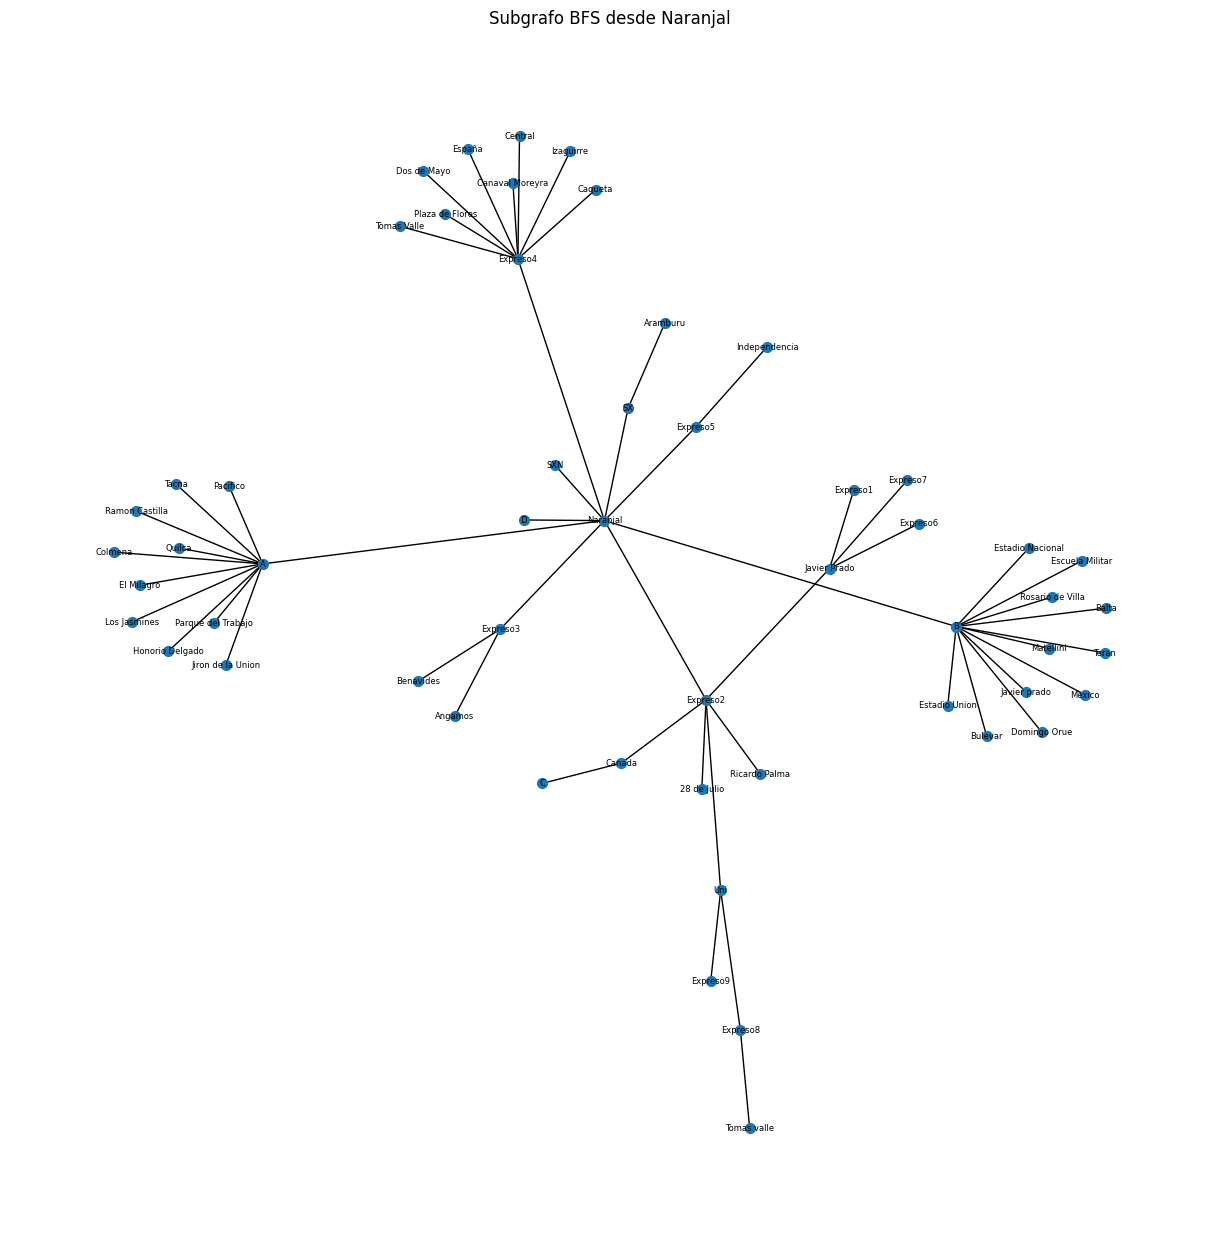

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos y aristas al grafo según los datos en los diccionarios
for estacion, conexiones in estaciones.items():
    G.add_node(estacion)
    for conexion in conexiones:
        G.add_edge(estacion, conexion)

for bus, rutas in buses.items():
    for ruta in rutas:
        G.add_edge(bus, ruta)

# Elegir un nodo inicial para BFS
nodo_inicial = 'Naranjal'

# Realizar BFS desde el nodo inicial
bfs_tree = nx.Graph(nx.bfs_edges(G, source=nodo_inicial))

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(bfs_tree, seed=42)  # Posición de los nodos
nx.draw(bfs_tree, pos, with_labels=True, node_size=50, font_size=6, font_color='black')
plt.title(f'Subgrafo BFS desde {nodo_inicial}')
plt.show()

In [ ]:
import heapq

class Grafo:
    def __init__(self):
        self.vertices = {}

    def agregar_vertice(self, vertice):
        if vertice not in self.vertices:
            self.vertices[vertice] = {}

    def agregar_arista(self, origen, destino, peso):
        if origen in self.vertices and destino in self.vertices:
            self.vertices[origen][destino] = peso
            self.vertices[destino][origen] = peso

    def mostrar_vertices(self):
        return self.vertices

    def Dijkstra(self, origen, destino):
        # Inicializar distancias y conjunto de nodos visitados
        distancias = {vertice: float('inf') for vertice in self.vertices}
        distancias[origen] = 0
        visitados = set()

        cola_prioridad = [(0, origen)]

        while cola_prioridad:
            distancia_actual, nodo_actual = heapq.heappop(cola_prioridad)

            if nodo_actual in visitados:
                continue
            visitados.add(nodo_actual)

            for vecino, peso in self.vertices[nodo_actual].items():
                distancia = distancias[nodo_actual] + peso
                if distancia < distancias[vecino]:
                    distancias[vecino] = distancia
                    heapq.heappush(cola_prioridad, (distancia, vecino))

        camino = []
        nodo_actual = destino
        while nodo_actual != origen:
            camino.append(nodo_actual)
            for vecino, peso in self.vertices[nodo_actual].items():
                if distancias[vecino] + peso == distancias[nodo_actual]:
                    nodo_actual = vecino
                    break
        camino.append(origen)


        camino.reverse()
        distancia_total = distancias[destino]
        return camino, distancia_total



In [ ]:

mi_grafo = Grafo()

nodos = [
    'Estacion A', 'Estacion B', 'Estacion C', 'Estacion D', 'Estacion E', 'Estacion F',
    'Naranjal', 'Izaguirre', 'Pacifico', 'Independencia', 'Los Jasmines', 'Tomas Valle',
    'El Milagro', 'Honorio Delgado', 'Uni', 'Parque del Trabajo', 'Caqueta', 'Dos de Mayo',
    'Quilca', 'España', 'Ramon Castilla', 'Tacna', 'Jiron de la Union', 'Colmena', 'Central',
    'Estadio Nacional', 'Mexico', 'Canada', 'Javier Prado', 'Canaval Moreyra', 'Aramburu',
    'Domingo Orue', 'Angamos', 'Ricardo Palma', 'Benavides', '28 de Julio', 'Plaza de Flores',
    'Balta', 'Bulevar', 'Estadio Union', 'Escuela Militar', 'Teran', 'Rosario de Villa',
    'Matellini', 'Expreso1', 'Expreso2', 'Expreso3', 'Expreso4', 'Expreso5', 'Expreso6',
    'Expreso7', 'Expreso8', 'Expreso9', 'SX', 'SXN'
]

for nodo in nodos:
    mi_grafo.agregar_vertice(nodo)


aristas = []

for estacion, conexiones in estaciones.items():
    for conexion in conexiones:
        aristas.append((estacion, conexion, 1))  # Suponemos un peso de 1 para las aristas


for bus, rutas in buses.items():
    for ruta in rutas:
        aristas.append((bus, ruta, 1))  # Suponemos un peso de 1 para las aristas

for arista in aristas:
    origen, destino, peso = arista
    mi_grafo.agregar_arista(origen, destino, peso)

# Dijkstra
origen = 'Naranjal'
destino = 'Ricardo Palma'
camino, distancia_total = mi_grafo.Dijkstra(origen, destino)

print(f"Camino más corto desde {origen} a {destino}: {camino}")
print(f"Distancia total: {distancia_total}")

Camino más corto desde Naranjal a Ricardo Palma: ['Naranjal', 'Expreso5', 'Ricardo Palma']
Distancia total: 2


In [ ]:
estaciones = {
    'Estacion A': ['Estacion B', 'Estacion C'],
    'Estacion B': ['Estacion A', 'Estacion D'],
    'Estacion C': ['Estacion A', 'Estacion E'],
    'Estacion D': ['Estacion B', 'Estacion F'],
    'Estacion E': ['Estacion C'],
    'Estacion F': ['Estacion D'],
    'Naranjal': ['Expreso2', 'Expreso3', 'Expreso4', 'Expreso5', 'SX', 'SXN', 'A', 'B', 'D'],
    'Izaguirre': ['A', 'B', 'D', 'Expreso4', 'Expreso6', 'Expreso8'],
    'Pacifico': ['A', 'B', 'D'],
    'Independencia': ['A', 'B', 'D', 'Expreso5', 'Expreso6', 'Expreso8'],
    'Los Jasmines': ['A', 'B', 'D'],
    'Tomas Valle': ['A', 'B', 'D', 'Expreso4', 'Expreso5', 'Expreso7', 'Expreso8'],
    'El Milagro': ['A', 'B', 'D'],
    'Honorio Delgado': ['A', 'B', 'D'],
    'Uni': ['A', 'B', 'D', 'Expreso2', 'Expreso4', 'Expreso5', 'Expreso8', 'Expreso9'],
    'Parque del Trabajo': ['A', 'B', 'D'],
    'Caqueta': ['A', 'B', 'D', 'Expreso4', 'Expreso5', 'Expreso8', 'Expreso9'],
    'Dos de Mayo': ['B', 'D', 'Expreso4'],
    'Quilca': ['A', 'B', 'D'],
    'España': ['A', 'B', 'D', 'Expreso4', 'Expreso5', 'Expreso8'],
    'Ramon Castilla':['A', 'C'],
    'Tacna':['A', 'C'],
    'Jiron de la Union':['A', 'C'],
    'Colmena':['A', 'C'],
    'Central': ['A', 'B', 'C', 'D', 'Expreso1', 'Expreso4', 'Expreso5', 'Expreso6', 'Expreso7', 'Expreso8', 'SXN'],
    'Estadio Nacional': ['B', 'C', 'Expreso1'],
    'Mexico': ['B', 'C'],
    'Canada': ['B', 'C', 'Expreso2', 'Expreso5', 'Expreso9'],
    'Javier Prado': ['B', 'C', 'Expreso1', 'Expreso2', 'Expreso4', 'Expreso5', 'Expreso6', 'Expreso7', 'Expreso8'],
    'Canaval Moreyra': ['B', 'C', 'Expreso1', 'Expreso4', 'Expreso5', 'Expreso6', 'Expreso7', 'Expreso8', 'Expreso8', 'SX'],
    'Aramburu': ['B', 'C', 'SX'],
    'Domingo Orue': ['B', 'C'],
    'Angamos': ['B', 'C', 'Expreso1', 'Expreso3', 'Expreso4', 'Expreso5', 'Expreso6', 'Expreso7', 'Expreso8', 'Expreso9'],
    'Ricardo Palma': ['B', 'C', 'Expreso5'],
    'Benavides': ['B', 'C', 'Expreso3', 'Expreso6', 'Expreso8', 'Expreso9'],
    '28 de Julio': ['B', 'C', 'Expreso1'],
    'Plaza de Flores': ['B', 'C', 'Expreso4', 'Expreso5', 'Expreso8'],
    'Balta': ['B', 'C', 'Expreso1'],
    'Bulevar': ['B', 'C', 'Expreso1'],
    'Estadio Union': ['B', 'C', 'Expreso1'],
    'Escuela Militar': ['B', 'C', 'Expreso1'],
    'Teran': ['B', 'C', 'Expreso1'],
    'Rosario de Villa': ['B', 'C', 'Expreso1'],
    'Matellini': ['B', 'C', 'Expreso1']
}

buses= {
    'Expreso1': ['Central', 'Estadio Nacional', 'Javier Prado', 'Canaval Moreyra', 'Angamos', '28 de Julio', 'Balta', 'Bulevar', 'Estadio Union', 'Escuela Militar', 'Teran', 'Rosario de Villa', 'Matellini'],
    'Expreso2': ['Naranjal', 'Canada', 'Javier Prado', 'Ricardo Palma', '28 de Julio'],
    'Expreso3': ['Naranjal', 'Angamos', 'Benavides'],
    'Expreso4': ['Naranjal', 'Izaguirre', 'Tomas Valle', 'Uni', 'Caqueta', 'Dos de Mayo', 'España', 'Central', 'Javier Prado', 'Canaval Moreyra', 'Angamos', 'Plaza de Flores'],
    'Expreso5': ['Naranjal', 'Independencia', 'Tomas Valle', 'Uni', 'España', 'Central', 'Canada', 'Javier Prado', 'Canaval Moreyra', 'Angamos', 'Ricardo Palma', 'Plaza de Flores'],
    'Expreso6': ['Izaguirre', 'Independencia', 'Central', 'Javier Prado', 'Canaval Moreyra', 'Angamos', 'Benavides'],
    'Expreso7': ['Tomas Valle', 'Central', 'Javier Prado', 'Canaval Moreyra', 'Angamos'],
    'Expreso8': ['Izaguirre', 'Independencia', 'Tomas valle', 'Uni', 'Caqueta', 'España', 'Central', 'Javier Prado', 'Canaval Moreyra', 'Angamos', 'Benavides', 'Plaza de Flores'],
    'Expreso9': ['Uni', 'Caqueta', 'Canada', 'Canaval Moreyra', 'Angamos', 'Benavides'],
    'SX': ['Naranjal', 'Canaval Moreyra', 'Aramburu'],
    'SXN':['Naranjal', 'Central'],
    'A':['Naranjal', 'Izaguirre', 'Pacifico', 'Independencia','Los Jasmines', 'Tomas Valle', 'El Milagro', 'Honorio Delgado', 'Uni', 'Parque del Trabajo', 'Caqueta', 'Ramon Castilla', 'Tacna', 'Jiron de la Union', 'Colmena', 'Central'],
    'B':['Naranjal', 'Izaguirre', 'Pacifico', 'Independencia','Los Jasmines', 'Tomas Valle', 'El Milagro', 'Honorio Delgado', 'Uni', 'Parque del Trabajo', 'Caqueta', 'Dos de Mayo', 'Quilca', 'España', 'Central', 'Estadio Nacional',
         'Mexico', 'Canada', 'Javier prado', 'Canaval Moreyra', 'Aramburu', 'Domingo Orue', 'Angamos', 'Ricardo Palma', 'Benavides','28 de Julio', 'Plaza de Flores', 'Balta', 'Bulevar', 'Estadio Union', 'Escuela Militar', 'Teran', 'Rosario de Villa', 'Matellini' ],
    'C':['Ramon Castilla', 'Tacna', 'Jiron de la Union', 'Colmena', 'Central', 'Estadio Nacional', 'Javier Prado', 'Canaval Moreyra', 'Angamos', '28 de Julio', 'Balta', 'Bulevar', 'Estadio Union', 'Escuela Militar', 'Teran', 'Rosario de Villa', 'Matellini'],
    'D':['Naranjal', 'Izaguirre', 'Pacifico', 'Independencia','Los Jasmines', 'Tomas Valle', 'El Milagro', 'Honorio Delgado', 'Uni', 'Parque del Trabajo', 'Caqueta', 'Dos de Mayo', 'Quilca', 'España', 'Central']
}

In [ ]:
import queue

class Grafo:
    def __init__(self):
        self.vertices = {}

    def agregar_vertice(self, vertice):
        if vertice not in self.vertices:
            self.vertices[vertice] = {}

    def agregar_arista(self, origen, destino, peso):
        if origen in self.vertices and destino in self.vertices:
            self.vertices[origen][destino] = peso
            self.vertices[destino][origen] = peso

    def mostrar_vertices(self):
        return self.vertices

    def BFS(self, origen, destino):
        visitados = set()
        cola = queue.Queue()
        camino = {}

        cola.put(origen)
        visitados.add(origen)
        camino[origen] = None

        while not cola.empty():
            nodo_actual = cola.get()

            if nodo_actual == destino:
                break

            for vecino in self.vertices[nodo_actual]:
                if vecino not in visitados:
                    cola.put(vecino)
                    visitados.add(vecino)
                    camino[vecino] = nodo_actual

        if destino not in camino:
            return None, float('inf')

        # Construir el camino desde el destino hasta el origen
        camino_reconstruido = []
        nodo_actual = destino
        while nodo_actual is not None:
            camino_reconstruido.append(nodo_actual)
            nodo_actual = camino[nodo_actual]

        # Invertir el camino y devolverlo junto con la distancia total
        camino_reconstruido.reverse()
        distancia_total = len(camino_reconstruido) - 1
        return camino_reconstruido, distancia_total

# Crear una instancia de la clase Grafo
mi_grafo = Grafo()

# Agregar nodos al grafo basados en los datos de los diccionarios
for nodo in estaciones.keys():
    mi_grafo.agregar_vertice(nodo)

# Agregar aristas al grafo basadas en los datos de los diccionarios
for origen, destinos in estaciones.items():
    for destino in destinos:
        mi_grafo.agregar_arista(origen, destino, 1)  # Suponemos un peso de 1

for origen, destinos in buses.items():
    for destino in destinos:
        mi_grafo.agregar_arista(origen, destino, 1)  # Suponemos un peso de 1

# Ejecutar el algoritmo de BFS
origen = 'Naranjal'
destino = 'Ricardo Palma'
camino, distancia_total = mi_grafo.BFS(origen, destino)

# Mostrar el resultado
if camino is not None:
    print(f"Camino más corto desde {origen} a {destino}: {camino}")
    print(f"Distancia total: {distancia_total}")
else:
    print(f"No se encontró un camino desde {origen} a {destino}")

No se encontró un camino desde Naranjal a Ricardo Palma


In [ ]:
import queue

class Grafo:
    def __init__(self):
        self.vertices = {}

    def agregar_vertice(self, vertice):
        if vertice not in self.vertices:
            self.vertices[vertice] = {}

    def agregar_arista(self, origen, destino, peso):
        if origen in self.vertices and destino in self.vertices:
            self.vertices[origen][destino] = peso
            self.vertices[destino][origen] = peso

    def mostrar_vertices(self):
        return self.vertices

    def BFS(self, origen, destino):
        visitados = set()
        cola = queue.Queue()
        camino = {}

        cola.put(origen)
        visitados.add(origen)
        camino[origen] = None

        while not cola.empty():
            nodo_actual = cola.get()

            if nodo_actual == destino:
                break

            for vecino in self.vertices[nodo_actual]:
                if vecino not in visitados:
                    cola.put(vecino)
                    visitados.add(vecino)
                    camino[vecino] = nodo_actual

        if destino not in camino:
            return None, float('inf')

        # Construir el camino desde el destino hasta el origen
        camino_reconstruido = []
        nodo_actual = destino
        while nodo_actual is not None:
            camino_reconstruido.append(nodo_actual)
            nodo_actual = camino[nodo_actual]

        # Invertir el camino y devolverlo junto con la distancia total
        camino_reconstruido.reverse()
        distancia_total = len(camino_reconstruido) - 1
        return camino_reconstruido, distancia_total

# Crear una instancia de la clase Grafo
mi_grafo = Grafo()

# Agregar nodos al grafo basados en los datos de los diccionarios
for nodo in estaciones.keys():
    mi_grafo.agregar_vertice(nodo)

# Agregar aristas al grafo basadas en los datos de los diccionarios
for origen, destinos in estaciones.items():
    for destino in destinos:
        mi_grafo.agregar_arista(origen, destino, 1)  # Suponemos un peso de 1

for origen, destinos in buses.items():
    for destino in destinos:
        mi_grafo.agregar_arista(origen, destino, 1)  # Suponemos un peso de 1

# Ejecutar el algoritmo de BFS para encontrar el camino más corto
origen = 'Estacion A'  # Cambia el origen según tus necesidades
destino = 'Estacion F'  # Cambia el destino según tus necesidades

camino, distancia_total = mi_grafo.BFS(origen, destino)

# Mostrar el resultado
if camino is not None:
    print(f"Camino más corto desde {origen} a {destino}: {camino}")
    print(f"Distancia total: {distancia_total}")
else:
    print(f"No se encontró un camino desde {origen} a {destino}")

Camino más corto desde Estacion A a Estacion F: ['Estacion A', 'Estacion B', 'Estacion D', 'Estacion F']
Distancia total: 3


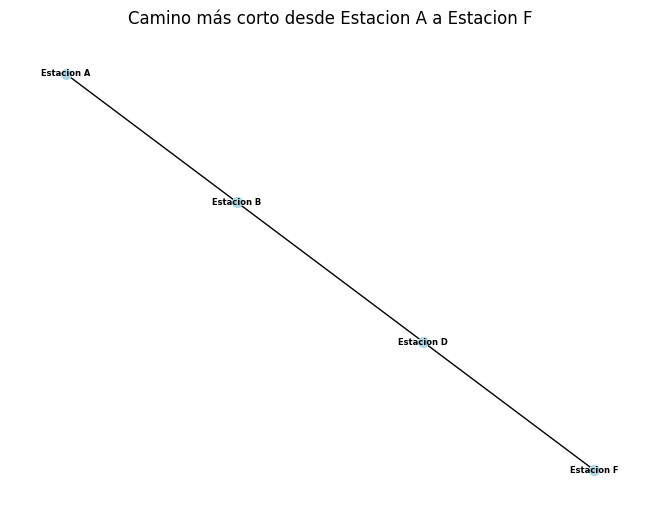

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()


for nodo in estaciones.keys():
    G.add_node(nodo)

for origen, destinos in estaciones.items():
    for destino in destinos:
        G.add_edge(origen, destino)

for origen, destinos in buses.items():
    for destino in destinos:
        G.add_edge(origen, destino)


origen = 'Estacion A'
destino = 'Estacion F'

# Encontrar el camino más corto
shortest_path = nx.shortest_path(G, source=origen, target=destino)

# Crear un subgrafo con el camino más corto
H = G.subgraph(shortest_path)

# Dibujar el subgrafo del camino más corto
pos = nx.spring_layout(H)  # Layout para organizar los nodos
nx.draw(H, pos, with_labels=True, node_size=50, font_size=6, node_color='lightblue', font_color='black', font_weight='bold')
plt.title(f"Camino más corto desde {origen} a {destino}")
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import queue

class Grafo:
    def __init__(self):
        self.vertices = {}

    def agregar_vertice(self, vertice):
        if vertice not in self.vertices:
            self.vertices[vertice] = {}

    def agregar_arista(self, origen, destino, peso):
        if origen in self.vertices and destino in self.vertices:
            self.vertices[origen][destino] = peso
            self.vertices[destino][origen] = peso

    def mostrar_vertices(self):
        return self.vertices

    def BFS(self, origen, destino):
        visitados = set()
        cola = queue.Queue()
        camino = {}

        cola.put(origen)
        visitados.add(origen)
        camino[origen] = None

        while not cola.empty():
            nodo_actual = cola.get()

            if nodo_actual == destino:
                break

            for vecino in self.vertices[nodo_actual]:
                if vecino not in visitados:
                    cola.put(vecino)
                    visitados.add(vecino)
                    camino[vecino] = nodo_actual

        if destino not in camino:
            return None, float('inf')


        camino_reconstruido = []
        nodo_actual = destino
        while nodo_actual is not None:
            camino_reconstruido.append(nodo_actual)
            nodo_actual = camino[nodo_actual]

        camino_reconstruido.reverse()
        distancia_total = len(camino_reconstruido) - 1
        return camino_reconstruido, distancia_total
mi_grafo = Grafo()

for nodo in estaciones.keys():
    mi_grafo.agregar_vertice(nodo)

for origen, destinos in estaciones.items():
    for destino in destinos:
        mi_grafo.agregar_arista(origen, destino, 1)

for origen, destinos in buses.items():
    for destino in destinos:
        mi_grafo.agregar_arista(origen, destino, 1)


origen = 'Estacion A'
destino = 'Estacion F'

camino, distancia_total = mi_grafo.BFS(origen, destino)

if camino is not None:
    print(f"Camino más corto desde {origen} a {destino}: {camino}")
    print(f"Distancia total: {distancia_total}")

    G = nx.Graph()
    G.add_nodes_from(camino)

    edges_in_shortest_path = [(camino[i], camino[i + 1]) for i in range(len(camino) - 1)]

    G.add_edges_from(edges_in_shortest_path)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=50, font_size=6, node_color='lightblue', font_color='black', font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=edges_in_shortest_path, edge_color='red', width=2)

    plt.title(f"Camino más corto desde {origen} a {destino}")
    plt.show()
else:
    print(f"No se encontró un camino desde {origen} a {destino}")

NameError: ignored